#### Load Data from Excel: 
        CUSTOMERS
        SELLERS
        PRODUCTS
        ORDERS
        ORDER_ITEMS
        ORDER_PAYMENTS
        ORDER_REVIEW_RATINGS
        GEO_LOCATION

In [1]:
import pandas as pd

customers = pd.read_csv(r"C:\Users\Vishal Agarwal\.ipynb_checkpoints\Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv")
sellers = pd.read_csv(r"C:\Users\Vishal Agarwal\.ipynb_checkpoints\Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv")
products = pd.read_csv(r"C:\Users\Vishal Agarwal\.ipynb_checkpoints\Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv")
orders = pd.read_csv(r"C:\Users\Vishal Agarwal\.ipynb_checkpoints\Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv")
order_items = pd.read_csv(r"C:\Users\Vishal Agarwal\.ipynb_checkpoints\Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv")
order_payments = pd.read_csv(r"C:\Users\Vishal Agarwal\.ipynb_checkpoints\Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv")
order_review_ratings = pd.read_csv(r"C:\Users\Vishal Agarwal\.ipynb_checkpoints\Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")
geo_location = pd.read_csv(r"C:\Users\Vishal Agarwal\.ipynb_checkpoints\Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv")

print(customers.columns)
print(sellers.columns)
print(products.columns)
print(orders.columns)
print(order_items.columns)
print(order_payments.columns)
print(order_review_ratings.columns)
print(geo_location.columns)

C:\Users\Vishal Agarwal\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['review_id', 'orde

In [ ]:
customers.customer_id

### The below are few Sample business questions to be addressed as part of this analysis. However this is not exhaustive list and you can add as many as analysis and provide insights on the same.

### 1. Perform Detailed exploratory analysis

##### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [12]:
total_revenue = order_payments['payment_value'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

total_revenue = order_payments['payment_value'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

total_unique_products = products['product_id'].nunique()
print(f"Total Unique Products: {total_unique_products}")

total_product_categories = products['product_category_name'].nunique()
print(f"Total Product Categories: {total_product_categories}")

total_sellers = sellers['seller_id'].nunique()
print(f"Total Sellers: {total_sellers}")

total_locations = geo_location[['geolocation_lat', 'geolocation_lng']].drop_duplicates().shape[0]
print(f"Total Locations: {total_locations}")

total_payment_methods = order_payments['payment_type'].nunique()
print(f"Total Payment Methods: {total_payment_methods}")

total_channels = orders['order_status'].nunique()
print(f"Total Channels (Order Statuses): {total_channels}")

average_order_value = order_payments['payment_value'].mean()
print(f"Average Order Value: ${average_order_value:.2f}")

Total Revenue: $16008872.12
Total Revenue: $16008872.12
Total Unique Products: 32951
Total Product Categories: 71
Total Sellers: 3095
Total Locations: 18988
Total Payment Methods: 5
Total Channels (Order Statuses): 8
Average Order Value: $154.10


#### b. Understanding how many new customers acquired every month

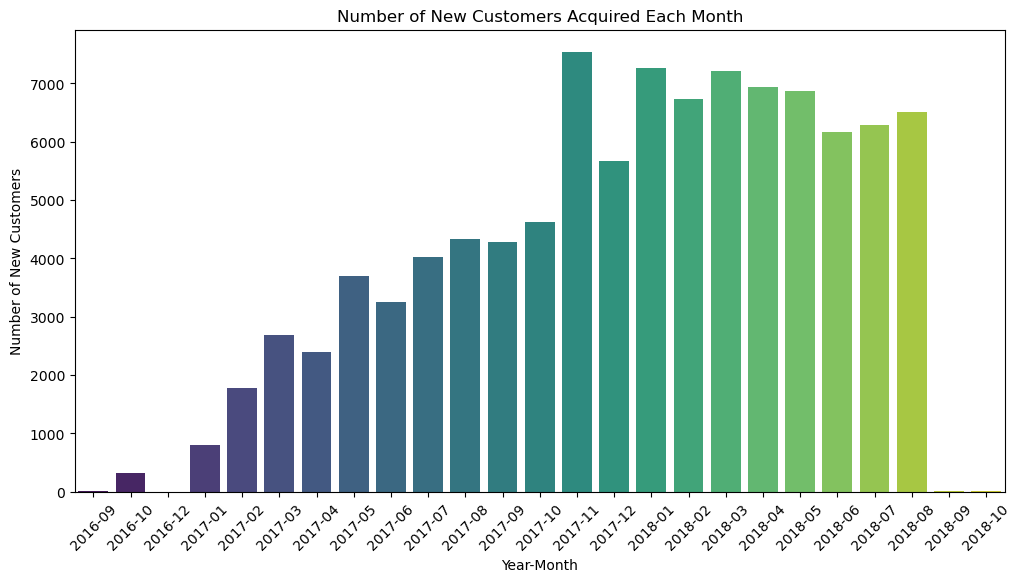

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

first_order_dates = orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()

first_order_dates['year_month'] = first_order_dates['order_purchase_timestamp'].dt.to_period('M')

new_customers_per_month = first_order_dates.groupby('year_month').size().reset_index(name='new_customers')


plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='new_customers', data=new_customers_per_month, palette='viridis')
plt.title('Number of New Customers Acquired Each Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.show()

#### c. Understand the retention of customers on month on month basis

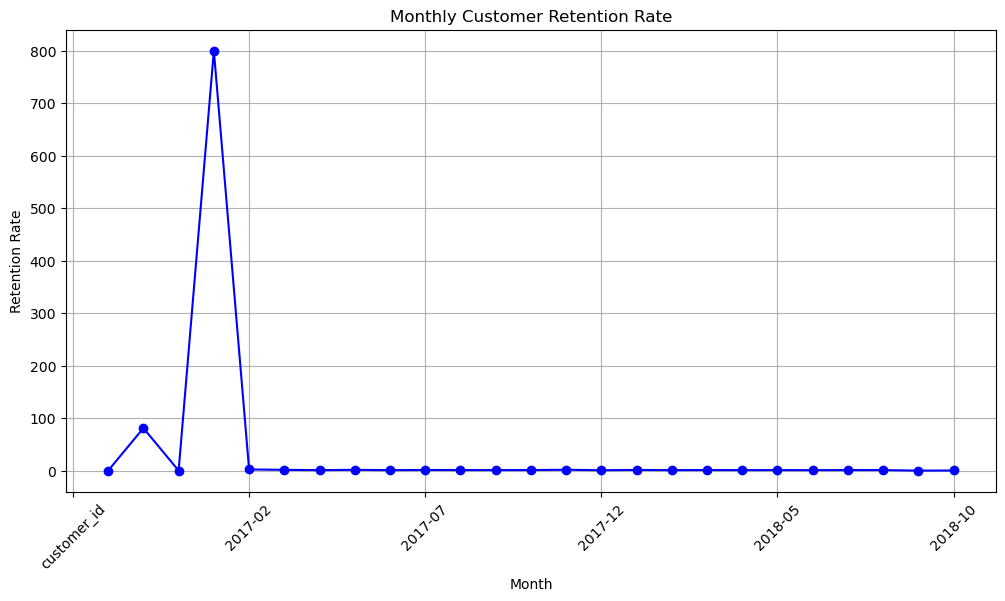

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders['order_year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

monthly_active_customers = orders.groupby('order_year_month')['customer_id'].nunique().reset_index()
monthly_active_customers.columns = ['order_year_month', 'active_customers']

retention_pivot = orders.pivot_table(index='customer_id', columns='order_year_month',
                                     values='order_purchase_timestamp', aggfunc='min').reset_index()

retention_matrix = retention_pivot.applymap(lambda x: 1 if pd.notnull(x) else 0)

retention_count = retention_matrix.sum()

monthly_retention_rate = retention_count / retention_count.shift(1)


plt.figure(figsize=(12, 6))
monthly_retention_rate.plot(kind='line', marker='o', color='b')
plt.title('Monthly Customer Retention Rate')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### d. How the revenues from existing/new customers on month on month basis

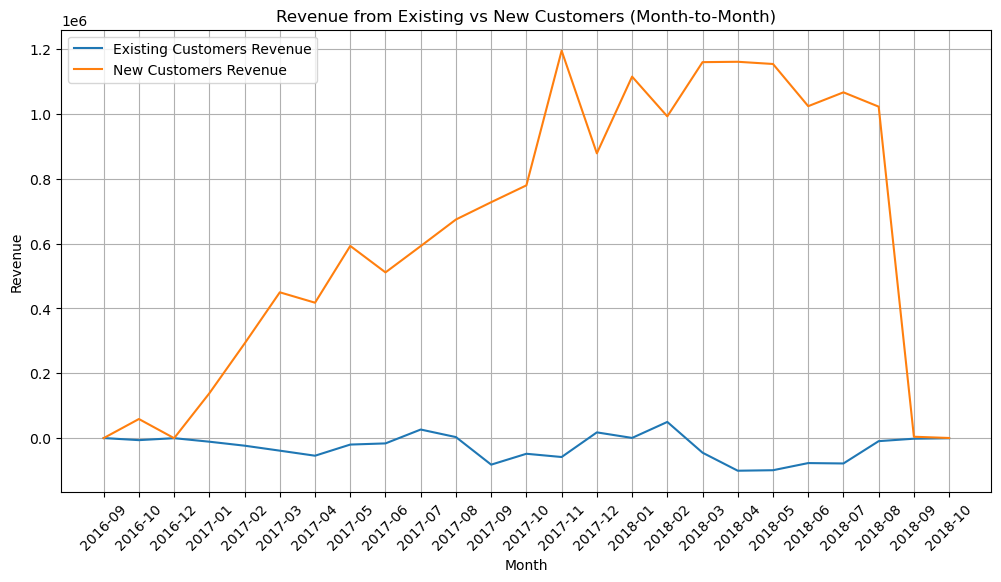

In [9]:
import pandas as pd

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

first_order_dates = orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_order_dates['order_year_month'] = first_order_dates['order_purchase_timestamp'].dt.to_period('M')

new_customers_with_payments = pd.merge(first_order_dates, orders[['order_id', 'customer_id']], on='customer_id', how='inner')
new_customers_revenue = pd.merge(new_customers_with_payments, order_payments[['order_id', 'payment_value']], on='order_id', how='inner')

revenue_from_new_customers = new_customers_revenue.groupby('order_year_month')['payment_value'].sum().reset_index()
revenue_from_new_customers['order_year_month'] = revenue_from_new_customers['order_year_month'].astype(str)
revenue_from_new_customers.columns = ['order_year_month', 'revenue_from_new_customers']

total_revenue_per_month = order_payments.groupby(orders['order_purchase_timestamp'].dt.to_period('M').astype(str))['payment_value'].sum().reset_index()
total_revenue_per_month.columns = ['order_year_month', 'total_revenue']

revenue_data = pd.merge(total_revenue_per_month, revenue_from_new_customers, on='order_year_month', how='left')
revenue_data['revenue_from_existing_customers'] = revenue_data['total_revenue'] - revenue_data['revenue_from_new_customers']


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(revenue_data['order_year_month'], revenue_data['revenue_from_existing_customers'], label='Existing Customers Revenue')
plt.plot(revenue_data['order_year_month'], revenue_data['revenue_from_new_customers'], label='New Customers Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue from Existing vs New Customers (Month-to-Month)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

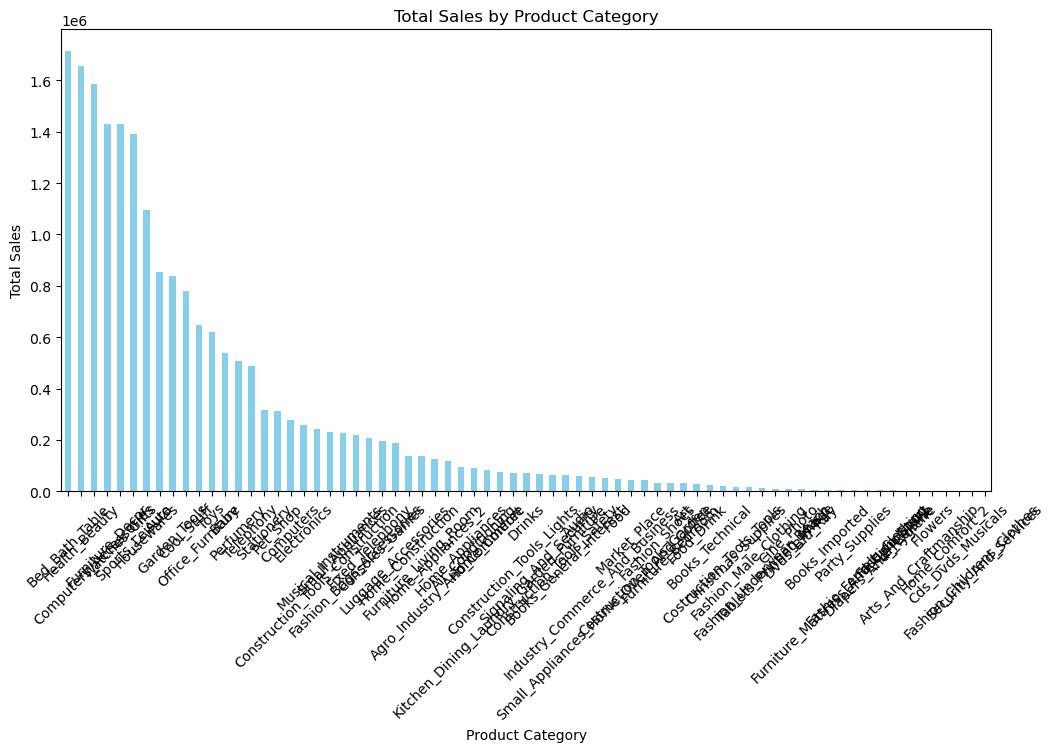

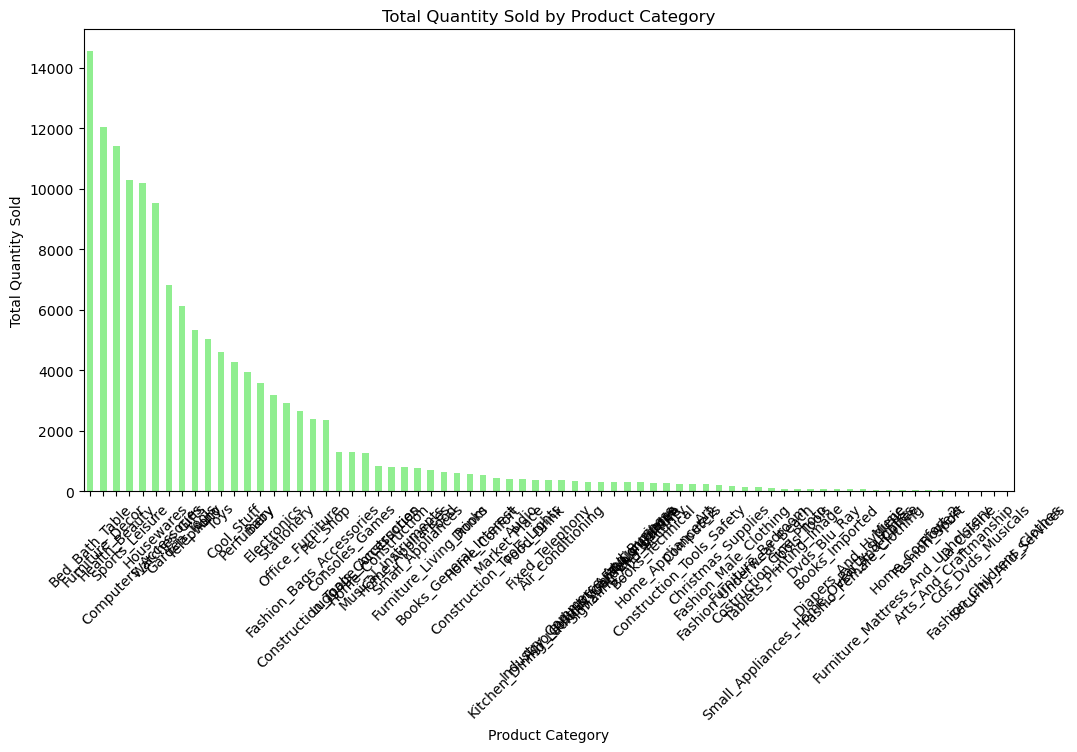

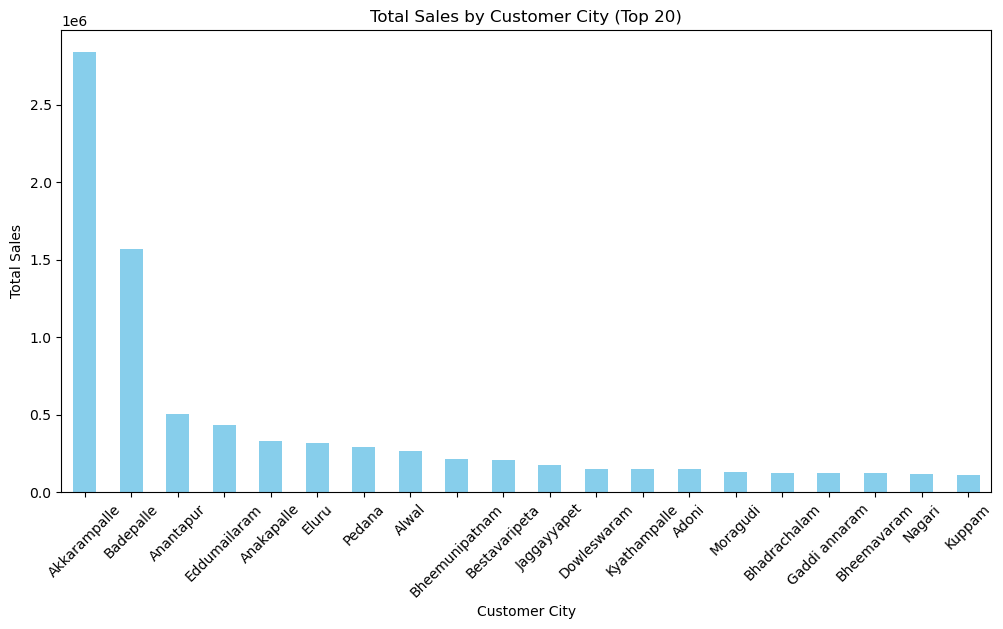

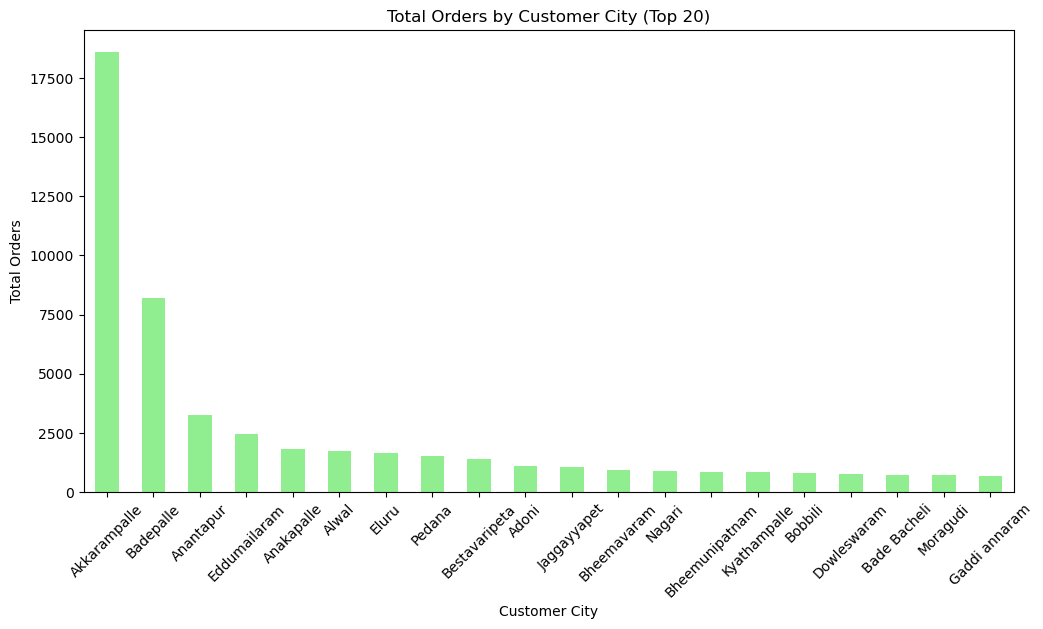

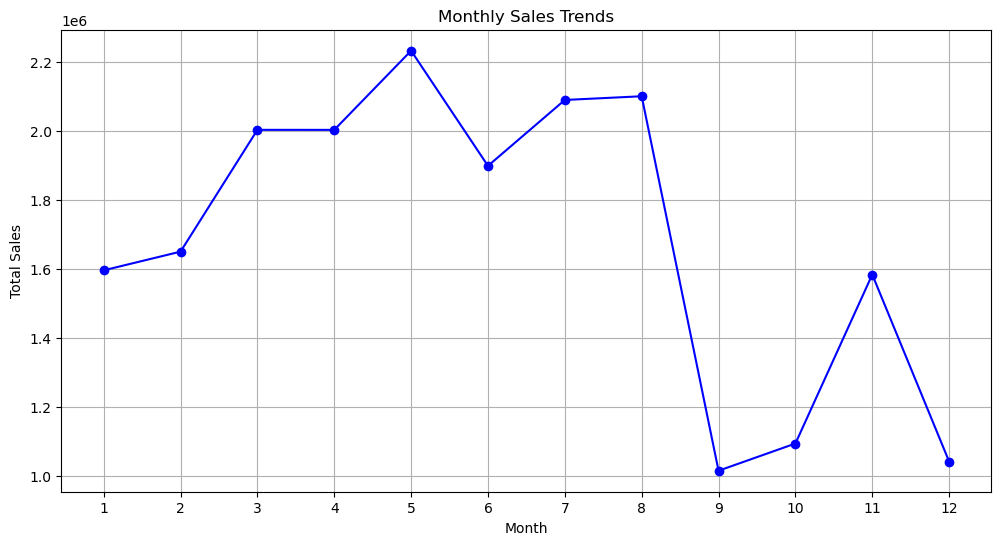

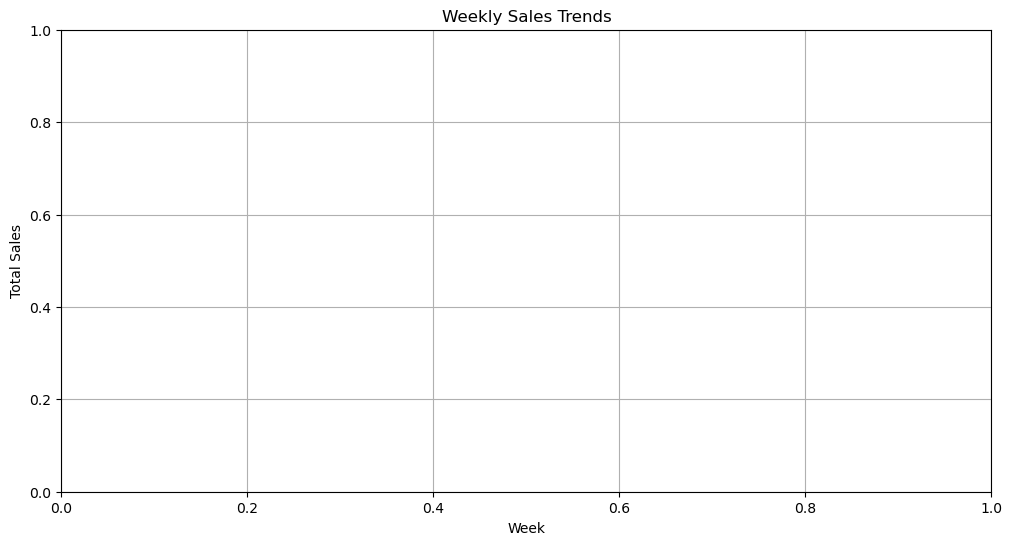

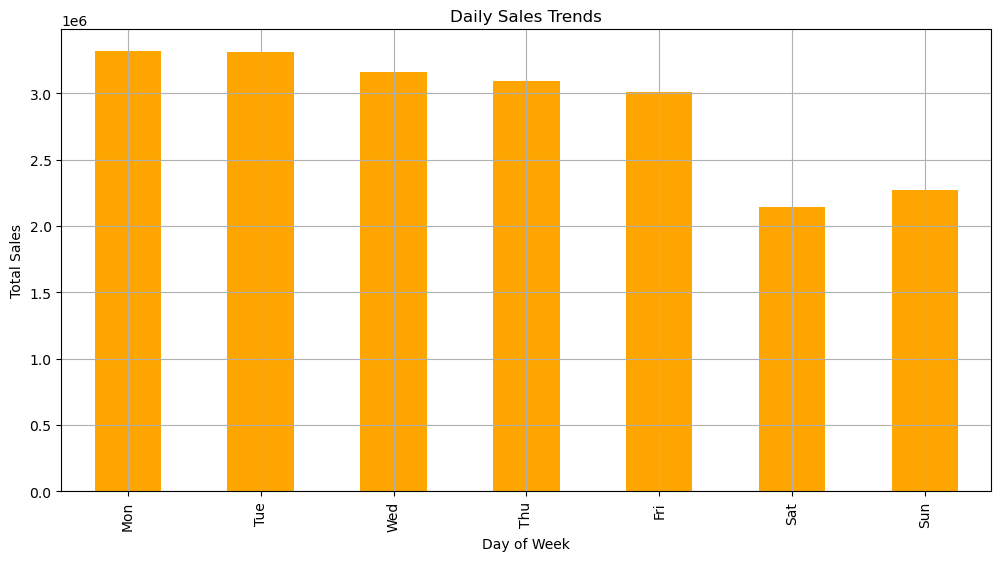

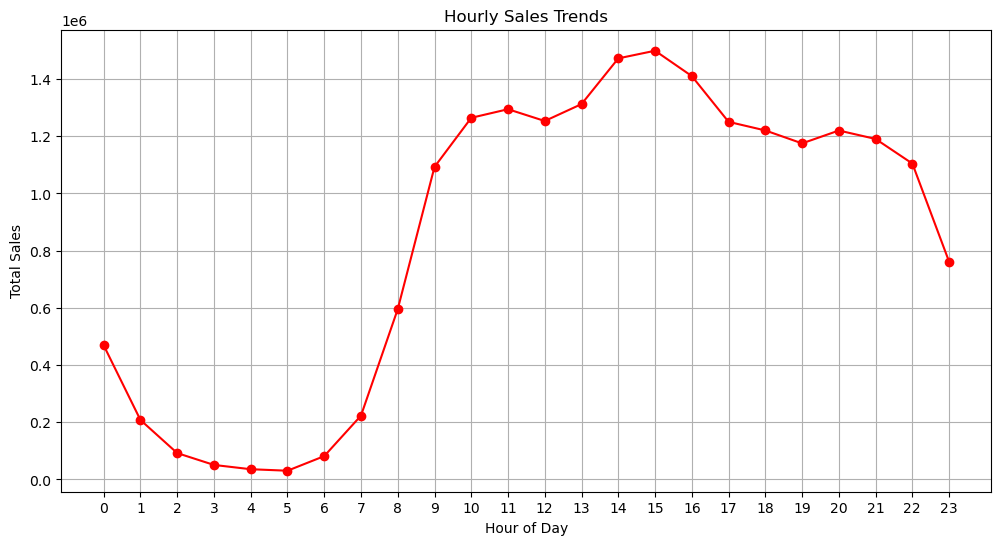

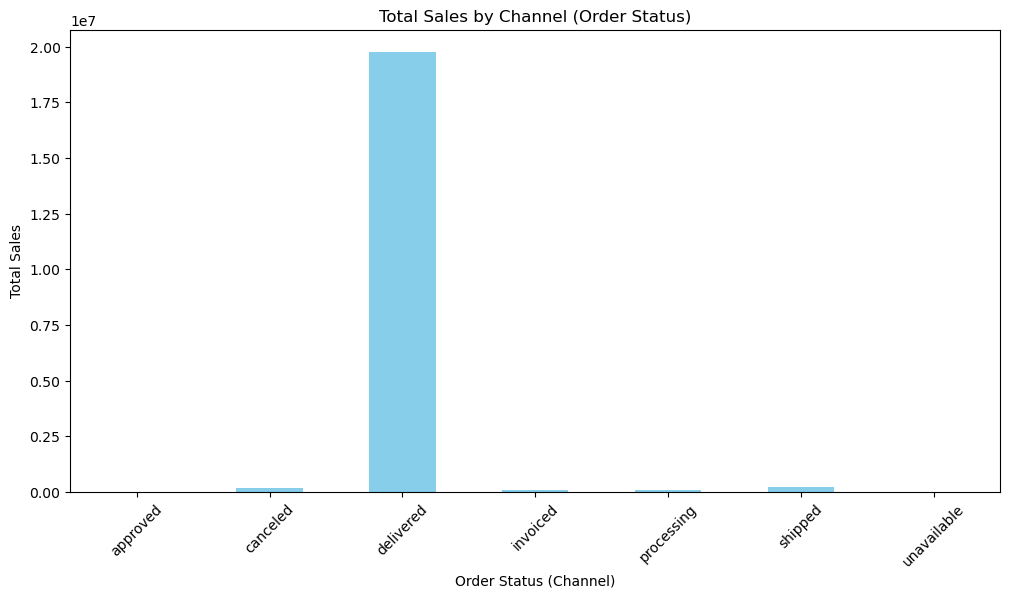

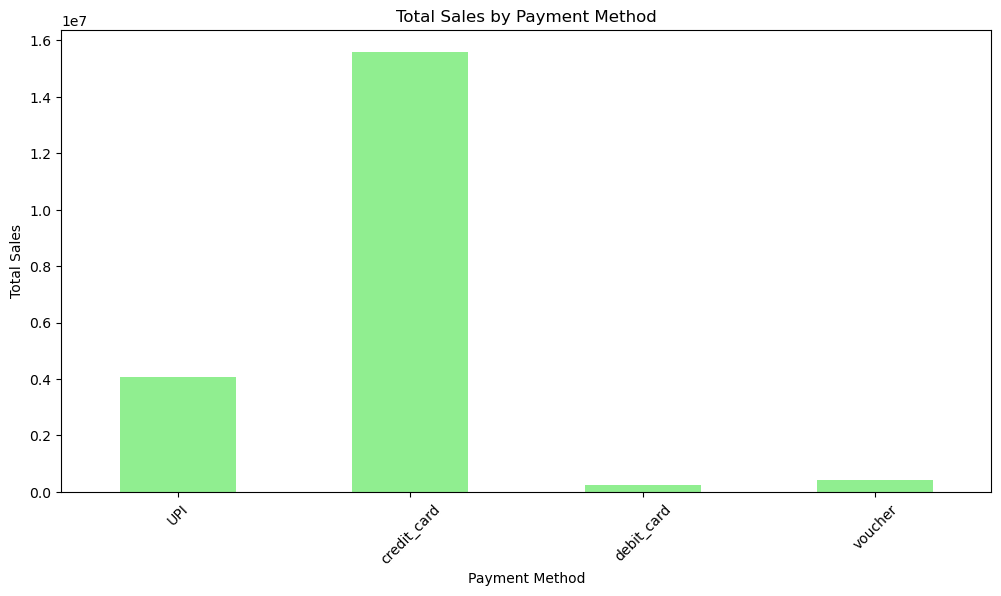

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

order_details = pd.merge(customers, orders, on='customer_id', how='inner')
order_details = pd.merge(order_details, order_payments, on='order_id', how='inner')
order_details = pd.merge(order_details, order_items, on='order_id', how='inner')
order_details = pd.merge(order_details, products, on='product_id', how='inner')

category_sales = order_details.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False)
category_quantity = order_details.groupby('product_category_name')['order_item_id'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
category_quantity.plot(kind='bar', color='lightgreen')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


city_sales = order_details.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False)
city_quantity = order_details.groupby('customer_city')['order_id'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_sales.head(20).plot(kind='bar', color='skyblue')
plt.title('Total Sales by Customer City (Top 20)')
plt.xlabel('Customer City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
city_quantity.head(20).plot(kind='bar', color='lightgreen')
plt.title('Total Orders by Customer City (Top 20)')
plt.xlabel('Customer City')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


order_details['order_month'] = order_details['order_purchase_timestamp'].dt.month
order_details['order_day'] = order_details['order_purchase_timestamp'].dt.dayofweek
order_details['order_hour'] = order_details['order_purchase_timestamp'].dt.hour

monthly_sales = order_details.groupby('order_month')['payment_value'].sum()
daily_sales = order_details.groupby('order_day')['payment_value'].sum()
hourly_sales = order_details.groupby('order_hour')['payment_value'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b', label='Monthly Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.title('Weekly Sales Trends')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='bar', color='orange')
plt.title('Daily Sales Trends')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o', color='r', label='Hourly Sales')
plt.title('Hourly Sales Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(24))
plt.grid(True)
plt.show()

channel_sales = order_details.groupby('order_status')['payment_value'].sum()
payment_method_sales = order_details.groupby('payment_type')['payment_value'].sum()

plt.figure(figsize=(12, 6))
channel_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Channel (Order Status)')
plt.xlabel('Order Status (Channel)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
payment_method_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#### f. Popular Products by month, seller, state, category

In [9]:
import pandas as pd

order_details = pd.merge(customers, orders, on='customer_id', how='inner')
order_details = pd.merge(order_details, order_payments, on='order_id', how='inner')
order_details = pd.merge(order_details, order_items, on='order_id', how='inner')
order_details = pd.merge(order_details, order_review_ratings, on='order_id', how='inner')
order_details = pd.merge(order_details, sellers, on='seller_id', how='inner')
order_details = pd.merge(order_details, products, on='product_id', how='inner')

popular_products_by_month = order_details.groupby([order_details['order_purchase_timestamp'].dt.to_period('M'), 'product_id'])['order_id'].count()
popular_products_by_month = popular_products_by_month.reset_index()
popular_products_by_month.columns = ['order_month', 'product_category_name', 'order_count']

most_popular_products_by_month = popular_products_by_month.sort_values(by='order_count', ascending=False).groupby('order_month').head(1)

print("Most Popular Products by Month:")
print(most_popular_products_by_month[['order_month', 'product_category_name', 'order_count']])

popular_products_by_seller_state = order_details.groupby(['seller_id', 'seller_state', 'product_id'])['order_id'].count()
popular_products_by_seller_state = popular_products_by_seller_state.reset_index()
popular_products_by_seller_state.columns = ['seller_id', 'seller_state', 'product_category_name', 'order_count']

most_popular_products_by_seller_state = popular_products_by_seller_state.sort_values(by='order_count', ascending=False).groupby(['seller_id', 'seller_state']).head(1)


print("\nMost Popular Products by Seller and State:")
print(most_popular_products_by_seller_state[['seller_id', 'seller_state', 'product_category_name', 'order_count']])

popular_products_by_category = order_details.groupby(['product_category_name', 'product_id'])['order_id'].count()
popular_products_by_category = popular_products_by_category.reset_index()
popular_products_by_category.columns = ['product_category_name', 'product_id', 'order_count']

most_popular_products_by_category = popular_products_by_category.sort_values(by='order_count', ascending=False).groupby('product_category_name').head(1)

print("\nMost Popular Products by Category:")
print(most_popular_products_by_category[['product_category_name', 'product_id', 'order_count']])

Most Popular Products by Month:
      order_month             product_category_name  order_count
31842     2018-01  aca2eb7d00ea1a7b8ebd4e68314663af          124
46883     2018-05  53b36df67ebb7c41585e8d54d6772e08          115
22318     2017-11  422879e10f46682990de24d770e7f83d           97
44107     2018-04  aca2eb7d00ea1a7b8ebd4e68314663af           88
61766     2018-08  e7cc48a9daff5436f63d3aad9426f28b           75
8488      2017-06  42a2c92a0979a949ca4ea89ec5c7b934           73
36607     2018-02  e53e557d5a159f5aa2c5e995dfdf244b           72
7008      2017-05  99a4788cb24856965c36a24e339b6058           66
39869     2018-03  aca2eb7d00ea1a7b8ebd4e68314663af           65
12380     2017-07  f1c7f353075ce59d8a6f3cf58f419c9c           63
26593     2017-12  422879e10f46682990de24d770e7f83d           55
15242     2017-08  f1c7f353075ce59d8a6f3cf58f419c9c           53
57094     2018-07  d285360f29ac7fd97640bf0baef03de0           47
3012      2017-03  7e0dc102074f8285580c9777f79c90cf       

#### g. Popular categories by state, month

In [60]:
import pandas as pd

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

order_details = pd.merge(customers, orders, on='customer_id', how='inner')
order_details = pd.merge(order_details, order_payments, on='order_id', how='inner')
order_details = pd.merge(order_details, order_items, on='order_id', how='inner')
order_details = pd.merge(order_details, order_review_ratings, on='order_id', how='inner')
order_details = pd.merge(order_details, sellers, on='seller_id', how='inner')
order_details = pd.merge(order_details, products, on='product_id', how='inner')

order_details['order_month'] = order_details['order_purchase_timestamp'].dt.to_period('M')

popular_categories_by_state_month = order_details.groupby(['seller_state', 'order_month', 'product_category_name']).size().reset_index(name='order_count')

most_popular_categories_by_state_month = popular_categories_by_state_month.loc[popular_categories_by_state_month.groupby(['seller_state', 'order_month'])['order_count'].idxmax()]

print("Most Popular Categories by State and Month:")
print(most_popular_categories_by_state_month)

Most Popular Categories by State and Month:
        seller_state order_month     product_category_name  order_count
0     Andhra Pradesh     2016-09                 Telephony            1
17    Andhra Pradesh     2016-10             Health_Beauty           41
27    Andhra Pradesh     2016-12  Fashion_Bags_Accessories            1
46    Andhra Pradesh     2017-01           Furniture_Decor           82
94    Andhra Pradesh     2017-02             Health_Beauty          154
...              ...         ...                       ...          ...
5045     West Bengal     2018-04     Computers_Accessories           58
5051     West Bengal     2018-05     Computers_Accessories           25
5058     West Bengal     2018-06              Garden_Tools           28
5062     West Bengal     2018-07              Garden_Tools           23
5066     West Bengal     2018-08              Garden_Tools           16

[379 rows x 4 columns]


#### h. List top 10 most expensive products sorted by price

In [17]:
import pandas as pd

order_details = pd.merge(customers, orders, on='customer_id', how='inner')
order_details = pd.merge(order_details, order_payments, on='order_id', how='inner')
order_details = pd.merge(order_details, order_items, on='order_id', how='inner')
order_details = pd.merge(order_details, order_review_ratings, on='order_id', how='inner')
order_details = pd.merge(order_details, sellers, on='seller_id', how='inner')
order_details = pd.merge(order_details, products, on='product_id', how='inner')

sorted_order_details = order_details.sort_values(by='payment_value', ascending=False)

top_10_expensive_categories = (
    sorted_order_details.groupby('product_category_name').sum()['payment_value'].sort_values(ascending=False).head(10))

print("Top 10 Most Expensive Product Categories:")
print(top_10_expensive_categories)

Top 10 Most Expensive Product Categories:
product_category_name
Bed_Bath_Table           1744205.53
Health_Beauty            1663076.30
Computers_Accessories    1599574.66
Furniture_Decor          1444383.69
Watches_Gifts            1430553.48
Sports_Leisure           1400270.11
Housewares               1097900.09
Auto                      855095.68
Garden_Tools              840721.59
Cool_Stuff                781933.97
Name: payment_value, dtype: float64


In [21]:
import pandas as pd

order_details = pd.merge(customers, orders, on='customer_id', how='inner')
order_details = pd.merge(order_details, order_payments, on='order_id', how='inner')
order_details = pd.merge(order_details, order_items, on='order_id', how='inner')
order_details = pd.merge(order_details, order_review_ratings, on='order_id', how='inner')
order_details = pd.merge(order_details, sellers, on='seller_id', how='inner')
order_details = pd.merge(order_details, products, on='product_id', how='inner')

sorted_order_details = order_details.sort_values(by='payment_value', ascending=False)

top_10_expensive_products = sorted_order_details.head(10)

unique_categories_top_10 = top_10_expensive_products['product_category_name'].unique()

print("Unique Product Categories of Top 10 Most Expensive Products:")
for category in unique_categories_top_10:
    print(category)

Unique Product Categories of Top 10 Most Expensive Products:
Fixed_Telephony


### 2. Performing Customers/sellers Segmentation

#### a. Divide the customers into groups based on the revenue generated ambs
#### b. Divide the sellers into groups based on the revenue generated

In [77]:
customer_revenue = order_details.groupby('customer_id')['payment_value'].sum().reset_index()

customer_revenue['revenue_segment'] = pd.qcut(customer_revenue['payment_value'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("Customer Segmentation based on Revenue:")
print(customer_revenue)

seller_revenue = order_details.groupby('seller_id')['payment_value'].sum().reset_index()

seller_revenue['revenue_segment'] = pd.qcut(seller_revenue['payment_value'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("\nSeller Segmentation based on Revenue:")
print(seller_revenue)

Customer Segmentation based on Revenue:
                            customer_id  payment_value revenue_segment
0      00012a2ce6f8dcda20d059ce98491703         114.74            High
1      000161a058600d5901f007fab4c27140          67.41          Medium
2      0001fd6190edaaf884bcaf3d49edf079         195.42            High
3      0002414f95344307404f0ace7a26f1d5         179.35            High
4      000379cdec625522490c315e70c7a9fb         107.01          Medium
...                                 ...            ...             ...
98660  fffcb937e9dd47a13f05ecb8290f4d3e          91.91          Medium
98661  fffecc9f79fd8c764f843e9951b11341          81.36          Medium
98662  fffeda5b6d849fbd39689bb92087f431          63.13          Medium
98663  ffff42319e9b2d713724ae527742af25         214.13       Very High
98664  ffffa3172527f765de70084a7e53aae8          91.00          Medium

[98665 rows x 3 columns]

Seller Segmentation based on Revenue:
                             seller_id  pay

#### 3. Cross-Selling (Which products are selling together)
          Hint: We need to find which of the top 10 combinations of products are selling together in each transaction                            (combination of 2 or 3 buying together)

In [31]:
import pandas as pd
from itertools import combinations
from collections import Counter

orders_grouped = order_details.groupby('order_id')['product_category_name'].agg(list).reset_index()

def find_top_combinations(products_list, n):
    combinations_list = []
    for products in products_list:
        if len(products) >= n:
            combinations_list.extend(combinations(products, n))
    return Counter(combinations_list).most_common(10)

top_2_combinations = find_top_combinations(orders_grouped['product_category_name'], 2)
top_3_combinations = find_top_combinations(orders_grouped['product_category_name'], 3)

print("Top 10 combinations of 2 products:")
for combination, count in top_2_combinations:
    print(f"{', '.join(combination)} - Count: {count}")

print("\nTop 10 combinations of 3 products:")
for combination, count in top_3_combinations:
    print(f"{', '.join(combination)} - Count: {count}")

Top 10 combinations of 2 products:
Bed_Bath_Table, Bed_Bath_Table - Count: 5931
Furniture_Decor, Furniture_Decor - Count: 4526
Housewares, Housewares - Count: 3137
Computers_Accessories, Computers_Accessories - Count: 2791
Garden_Tools, Garden_Tools - Count: 2569
Sports_Leisure, Sports_Leisure - Count: 2071
Health_Beauty, Health_Beauty - Count: 2064
Office_Furniture, Office_Furniture - Count: 1687
Watches_Gifts, Watches_Gifts - Count: 915
Bed_Bath_Table, Housewares - Count: 912

Top 10 combinations of 3 products:
Bed_Bath_Table, Bed_Bath_Table, Bed_Bath_Table - Count: 22284
Bed_Bath_Table, Bed_Bath_Table, Housewares - Count: 18088
Office_Furniture, Office_Furniture, Office_Furniture - Count: 9615
Bed_Bath_Table, Housewares, Housewares - Count: 8844
Garden_Tools, Garden_Tools, Garden_Tools - Count: 7912
Furniture_Decor, Furniture_Decor, Furniture_Decor - Count: 5427
Housewares, Housewares, Housewares - Count: 5117
Computers_Accessories, Computers_Accessories, Computers_Accessories - Cou

#### 4. Payment Behaviour
        a. How customers are paying?
        b. Which payment channels are used by most customers?

In [32]:
import pandas as pd

payment_counts = order_payments['payment_type'].value_counts()

payment_percentage = (payment_counts / payment_counts.sum()) * 100

print("\nPayment Counts:")
print(payment_counts)

print("\nPayment Percentages:")
print(payment_percentage)

most_used_payment_channels = payment_counts.idxmax()
print(f"\nMost commonly used payment channel: {most_used_payment_channels}")

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

Payment Counts:
payment_type
credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Payment Percentages:
payment_type
credit_card    73.922376
UPI            19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: count, dtype: float64

Most commonly used payment channel: credit_card


#### 5. Customer satisfaction towards category & product
        a. Which categories (top 10) are maximum rated & minimum rated?
        b. Which products (top10) are maximum rated & minimum rated?
        c. Average rating by location, seller, product, category, month etc.

In [20]:
import pandas as pd

order_review_ratings['review_creation_date'] = pd.to_datetime(order_review_ratings['review_creation_date'])

order_details = pd.merge(order_details, geo_location, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

category_ratings = order_details.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
product_ratings = order_details.groupby('product_id')['review_score'].mean().sort_values(ascending=False)

top_rated_categories = category_ratings.head(10)
bottom_rated_categories = category_ratings.tail(10)

top_rated_products = product_ratings.head(10)
bottom_rated_products = product_ratings.tail(10)

print("\nTop 10 Maximum Rated Categories:")
print(top_rated_categories)

print("\nTop 10 Minimum Rated Categories:")
print(bottom_rated_categories)

print("\nTop 10 Maximum Rated Products:")
print(top_rated_products)

print("\nTop 10 Minimum Rated Products:")
print(bottom_rated_products)

average_rating_by_city = order_details.groupby('geolocation_city')['review_score'].mean()

average_rating_by_seller = order_details.groupby('seller_id')['review_score'].mean()

order_details['review_month'] = order_review_ratings['review_creation_date'].dt.month
average_rating_by_month = order_details.groupby('review_month')['review_score'].mean()

print("\nAverage Rating by City:")
print(average_rating_by_city)

print("\nAverage Rating by Seller:")
print(average_rating_by_seller)

print("\nAverage Rating by Month:")
print(average_rating_by_month)


Top 10 Maximum Rated Categories:
product_category_name
Cds_Dvds_Musicals                        4.642857
Fashion_Childrens_Clothes                4.500000
Books_General_Interest                   4.430851
Books_Imported                           4.419355
Books_Technical                          4.345588
Costruction_Tools_Tools                  4.333333
Small_Appliances_Home_Oven_And_Coffee    4.320513
Food_Drink                               4.312715
Luggage_Accessories                      4.289905
Cine_Photo                               4.216216
Name: review_score, dtype: float64

Top 10 Minimum Rated Categories:
product_category_name
Construction_Tools_Safety            3.834171
Audio                                3.823684
Furniture_Mattress_And_Upholstery    3.804878
Fashio_Female_Clothing               3.780000
Fixed_Telephony                      3.660517
Fashion_Male_Clothing                3.531034
Office_Furniture                     3.516274
Home_Comfort_2                 